In [11]:
# necessayr package

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
import os
from google.colab import files
import shutil

In [4]:
uploaded = files.upload()

Saving test_multioff_preds_bert_20_epochs.npy to test_multioff_preds_bert_20_epochs.npy
Saving test_multioff_preds_bert_30_epochs.npy to test_multioff_preds_bert_30_epochs.npy
Saving test_multioff_preds_roberta_3_epochs.npy to test_multioff_preds_roberta_3_epochs.npy
Saving test_multioff_preds_roberta_20_epochs.npy to test_multioff_preds_roberta_20_epochs.npy
Saving test_multioff_preds_roberta_30_epochs.npy to test_multioff_preds_roberta_30_epochs.npy
Saving test_multioff_probs_bert_20_epochs.npy to test_multioff_probs_bert_20_epochs.npy
Saving test_multioff_probs_bert_30_epochs.npy to test_multioff_probs_bert_30_epochs.npy
Saving test_multioff_probs_roberta_3_epochs.npy to test_multioff_probs_roberta_3_epochs.npy
Saving test_multioff_probs_roberta_20_epochs.npy to test_multioff_probs_roberta_20_epochs.npy
Saving test_multioff_probs_roberta_30_epochs.npy to test_multioff_probs_roberta_30_epochs.npy
Saving train_multioff_preds_bert_20_epochs.npy to train_multioff_preds_bert_20_epochs.np

In [5]:
#organize files into /content/outputs/
output_dir = "/content/outputs"
os.makedirs(output_dir, exist_ok=True)

for filename in uploaded.keys():
    if filename.endswith(".npy"):
        shutil.move(filename, os.path.join(output_dir, filename))
    elif filename.endswith(".zip"):
        !unzip {filename} -d {output_dir}

print(f"Files moved to {output_dir}")
print("Contents of outputs:", os.listdir(output_dir))

Files moved to /content/outputs
Contents of outputs: ['test_multioff_preds_bert_30_epochs.npy', 'test_multioff_probs_bert_30_epochs.npy', 'y_preds_xlmr_sota.npy', 'train_multioff_preds_roberta_3_epochs.npy', 'y_probs_xlmr_10_epochs.npy', 'y_true_xlmr_sota_2_epochs.npy', 'y_probs_xlmr_sota_5_epochs.npy', 'y_probs_bert_roberta.npy', 'y_preds_xlmr_sota_5_epochs.npy', 'y_preds_xlmr_sota_20_epochs.npy', 'y_probs_roberta_3_epochs.npy', 'val_multioff_probs_roberta_3_epochs.npy', 'y_probs_bert_20_epochs.npy', 'val_multioff_probs_roberta_20_epochs.npy', 'test_multioff_probs_roberta_3_epochs.npy', 'test_multioff_probs_roberta_30_epochs.npy', 'val_multioff_probs_bert_20_epochs.npy', 'test_multioff_preds_bert_20_epochs.npy', 'y_preds_bert_roberta.npy', 'train_multioff_probs_roberta_30_epochs.npy', 'y_probs_xlmr_sota_10_epochs.npy', 'y_probs_roberta_30_epochs.npy', 'val_multioff_probs_roberta_30_epochs.npy', 'train_multioff_probs_bert_20_epochs.npy', 'val_multioff_preds_roberta_3_epochs.npy', 'val_

In [6]:
#load data
y_true = np.load(os.path.join(output_dir, "y_true_clip.npy"))  # Use CLIP labels as ground truth

y_probs_clip = np.load(os.path.join(output_dir, "y_probs_clip.npy"))
y_probs_bert = np.load(os.path.join(output_dir, "y_probs_bert_roberta.npy"))
y_probs_xlmr = np.load(os.path.join(output_dir, "y_probs_xlmr.npy"))
y_probs_xlmr_sota = np.load(os.path.join(output_dir, "y_probs_xlmr_sota.npy"))

In [12]:
# eval function
def evaluate_model(y_true, y_probs, model_name):
    preds = (y_probs >= 0.5).astype(int)
    auc = roc_auc_score(y_true, y_probs)
    f1 = f1_score(y_true, preds)
    acc = accuracy_score(y_true, preds)
    cm = confusion_matrix(y_true, preds)

    print(f"{model_name} Results:")
    print(f"  AUC-ROC: {auc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Accuracy: {acc:.4f}")
    print()

    return auc, f1, acc, cm

In [13]:
# evaluate
clip_results = evaluate_model(y_true, y_probs_clip, "CLIP CNN")

# BERT, XLM-R and XLM-R SOTA, slice y_true to match the number of predictions
bert_results = evaluate_model(y_true[:len(y_probs_bert)], y_probs_bert, "BERT/Roberta CNN")
xlmr_results = evaluate_model(y_true[:len(y_probs_xlmr)], y_probs_xlmr, "XLM-R CNN")
xlmr_sota_results = evaluate_model(y_true[:len(y_probs_xlmr_sota)], y_probs_xlmr_sota, "XLM-R SOTA")

CLIP CNN Results:
  AUC-ROC: 0.7339
  F1 Score: 0.2634
  Accuracy: 0.6776

BERT/Roberta CNN Results:
  AUC-ROC: 0.4786
  F1 Score: 0.0384
  Accuracy: 0.6490

XLM-R CNN Results:
  AUC-ROC: 0.4825
  F1 Score: 0.0633
  Accuracy: 0.6450

XLM-R SOTA Results:
  AUC-ROC: 0.4893
  F1 Score: 0.2622
  Accuracy: 0.5780



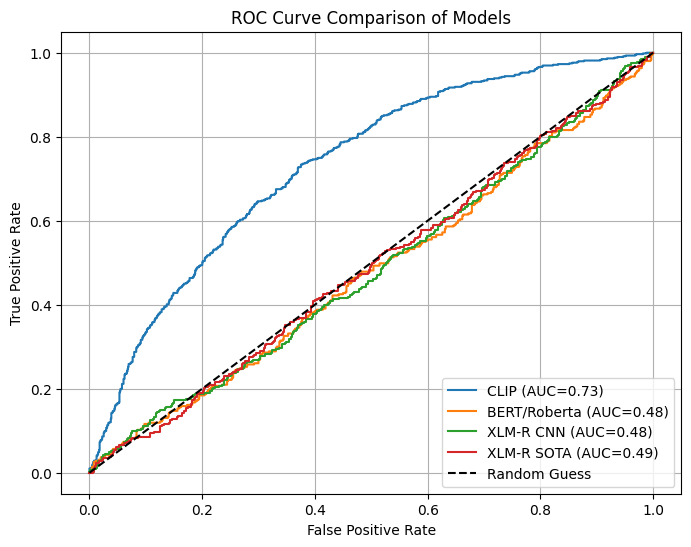

In [14]:
# plot ROC
# CLIP uses full y_true
fpr_clip, tpr_clip, _ = roc_curve(y_true, y_probs_clip)

# BERT and XLM-R use sliced y_true to match predictions
fpr_bert, tpr_bert, _ = roc_curve(y_true[:len(y_probs_bert)], y_probs_bert)
fpr_xlmr, tpr_xlmr, _ = roc_curve(y_true[:len(y_probs_xlmr)], y_probs_xlmr)
fpr_xlmr_sota, tpr_xlmr_sota, _ = roc_curve(y_true[:len(y_probs_xlmr_sota)], y_probs_xlmr_sota)


plt.figure(figsize=(8,6))
plt.plot(fpr_clip, tpr_clip, label=f"CLIP (AUC={clip_results[0]:.2f})")
plt.plot(fpr_bert, tpr_bert, label=f"BERT/Roberta (AUC={bert_results[0]:.2f})")
plt.plot(fpr_xlmr, tpr_xlmr, label=f"XLM-R CNN (AUC={xlmr_results[0]:.2f})")
plt.plot(fpr_xlmr_sota, tpr_xlmr_sota, label=f"XLM-R SOTA (AUC={xlmr_sota_results[0]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Models")
plt.legend(loc="lower right")
plt.grid(True)

#saving the outputs
plt.savefig(os.path.join(output_dir, "roc_comparison_all_models.png"))
plt.show()

Text(0.5, 0.98, 'Confusion Matrices')

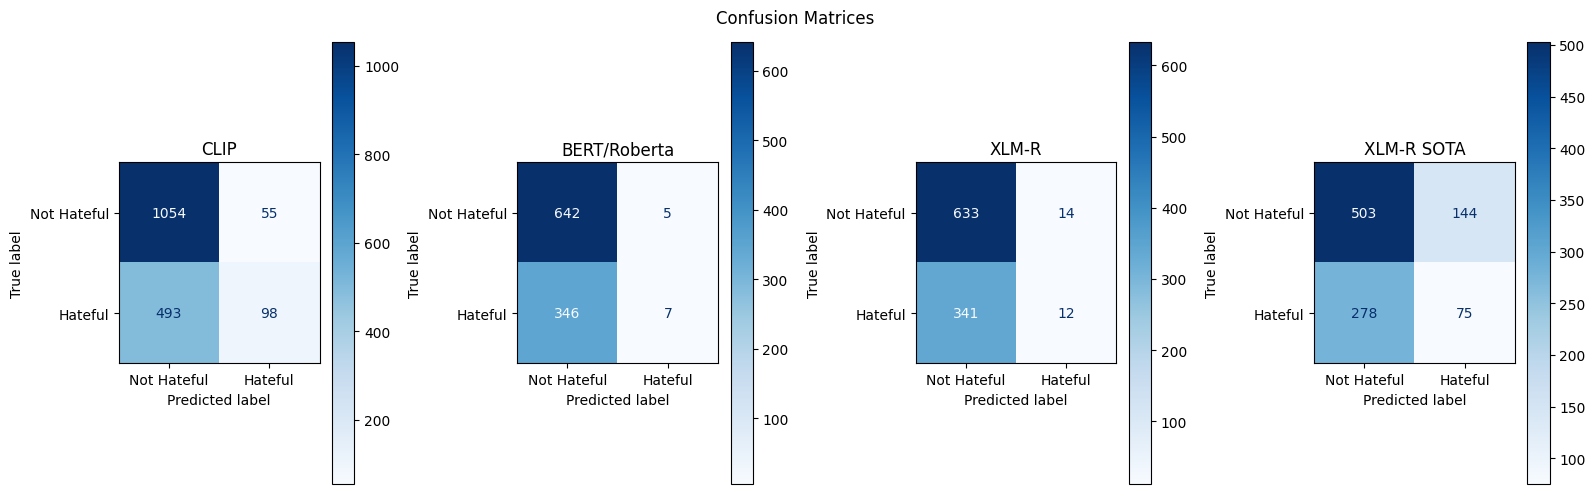

In [15]:
#conf matrices
fig, axs = plt.subplots(1, 4, figsize=(16,5))

ConfusionMatrixDisplay(clip_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[0], cmap=plt.cm.Blues, values_format='d')
axs[0].set_title("CLIP")

ConfusionMatrixDisplay(bert_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[1], cmap=plt.cm.Blues, values_format='d')
axs[1].set_title("BERT/Roberta")

ConfusionMatrixDisplay(xlmr_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[2], cmap=plt.cm.Blues, values_format='d')
axs[2].set_title("XLM-R")

ConfusionMatrixDisplay(xlmr_sota_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[3], cmap=plt.cm.Blues, values_format='d')
axs[3].set_title("XLM-R SOTA")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Confusion Matrices")

#saving the outputs
#plt.savefig(os.path.join(output_dir, "confusion_matrices_all_models.png"))
#plt.show()